In [1]:
import pandas as pd
import numpy as np

In [2]:
# Base libraries
import pandas as pd
import numpy as np
from pyforest import *

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [3]:
energy = pd.read_excel('C:/Users/igrav/Desktop/ironhack/Lecture/Project_W5/energy-data-master/owid-energy-data2.xlsx')
pd.set_option('display.max_columns', None)
energy.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22303 entries, 0 to 22302
Columns: 128 entries, country to wind_share_energy
dtypes: float64(125), int64(1), object(2)
memory usage: 21.8+ MB


In [5]:
energy.dtypes

country                    object
year                        int64
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 128, dtype: object

## Drop the unrelevant columns

In [6]:
energy.drop(energy.columns.difference(['country', 'iso_code', 'year',  'population', 'gdp', 'greenhouse_gas_emissions', 'electricity_demand', ' primary_energy_consumption', ' renewables_consumption', ' carbon_intensity_elec', 'low_carbon_consumption', 'fossil_fuel_consumption', 'hydro_consumption', 'biofuel_consumption', 'wind_consumption', 'solar_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'coal_consumption', 'oil_consumption', 'gas_consumption']), 1, inplace=True)
# energy2 = energy[energy.columns.difference(['gdp', 'population'])]


C:\Users\igrav\AppData\Local\Temp\ipykernel_16432\3910879171.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop(energy.columns.difference(['country', 'iso_code', 'year',  'population', 'gdp', 'greenhouse_gas_emissions', 'electricity_demand', ' primary_energy_consumption', ' renewables_consumption', ' carbon_intensity_elec', 'low_carbon_consumption', 'fossil_fuel_consumption', 'hydro_consumption', 'biofuel_consumption', 'wind_consumption', 'solar_consumption', 'nuclear_consumption', 'other_renewable_consumption', 'coal_consumption', 'oil_consumption', 'gas_consumption']), 1, inplace=True)


In [7]:
energy.head()
energy.shape


(22303, 18)

In [8]:
## To do
# ++ Round Value
# ++ Change GDP in B$ + rename
# ++ Change Pop in million + rename
# ++ Rename greenhouse_gas_emissions
# ++ Drop row from 1900-2000
# ++ Drop columns : keep only the consumption per energy source
# ++Drop Columns where pop =""
# ++ Drop gdp<100 000 000 000
# ++Drop ussr
# ++Add columns Continent
# ++Add Co2/hab
# ++Add Co2/GDP


In [9]:
energy.describe()

,year,population,gdp,biofuel_consumption,coal_consumption,electricity_demand,fossil_fuel_consumption,gas_consumption,greenhouse_gas_emissions,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,solar_consumption,wind_consumption
count,22303.000000,1.797100e+04,1.106900e+04,1603.000000,6134.000000,5297.000000,6068.000000,6094.000000,4947.000000,6153.000000,6153.000000,5624.000000,6160.000000,5948.000000,5924.000000,5939.000000
mean,1973.798278,1.052054e+08,5.288438e+11,42.128602,1625.004307,522.367278,5136.950650,1228.198487,253.349028,389.260798,762.639408,302.729236,2228.388230,38.613753,13.394788,37.059412
std,34.631780,4.595220e+08,4.023954e+12,117.225193,4907.816575,2295.996586,13737.030113,3413.741784,1120.167176,1048.264066,2234.979588,967.533461,5840.259342,142.497495,100.840582,215.446959
min,1900.000000,1.606000e+03,1.642060e+08,0.000000,0.000000,0.000000,0.097000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097000,0.000000,0.000000,0.000000
25%,1946.000000,1.735172e+06,1.359985e+10,0.000000,4.537500,1.300000,149.484500,12.293000,0.240000,4.077000,7.325000,0.000000,80.954250,0.000000,0.000000,0.000000
50%,1984.000000,7.089486e+06,4.138914e+10,2.754000,46.896000,10.140000,418.682500,81.497000,2.390000,31.284000,52.575000,0.000000,208.418500,0.641500,0.000000,0.000000
75%,2002.000000,2.574816e+07,1.726600e+11,20.445500,442.860000,71.860000,1808.173250,429.343500,24.050000,170.328000,266.650000,58.230000,999.276500,11.032500,0.047000,0.627000
max,2021.000000,7.874956e+09,1.090802e+14,1139.921000,45161.207000,27450.381000,136131.469000,40374.605000,12104.860000,11413.827000,29301.400000,7654.419000,53368.625000,2373.099000,2701.722000,4872.095000


In [10]:
energy = energy[energy['year'].astype('int')>1999]

In [11]:
energy = energy[energy['gdp']>100000000000]


In [12]:
energy['gdp'] = energy['gdp']/1000000000
energy['population'] = energy['population']/1000000


In [13]:
energy.rename(columns={'gdp':'gdp_B$', 'population':'pop_Million', 'greenhouse_gas_emissions':'M_Tonnes_C02_eq'},inplace=True) 
energy = energy.round(0)


In [14]:
energy.head(100)

,country,year,iso_code,pop_Million,gdp_B$,biofuel_consumption,coal_consumption,electricity_demand,fossil_fuel_consumption,gas_consumption,M_Tonnes_C02_eq,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,solar_consumption,wind_consumption
638,Algeria,2000,DZA,31.0,209.0,NaN,6.0,24.0,300.0,191.0,12.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0
639,Algeria,2001,DZA,31.0,223.0,NaN,7.0,25.0,311.0,197.0,12.0,0.0,0.0,0.0,107.0,0.0,0.0,0.0
640,Algeria,2002,DZA,32.0,245.0,NaN,9.0,26.0,322.0,195.0,13.0,0.0,0.0,0.0,118.0,0.0,0.0,0.0
641,Algeria,2003,DZA,32.0,274.0,NaN,7.0,28.0,336.0,206.0,14.0,1.0,1.0,0.0,123.0,0.0,0.0,0.0
642,Algeria,2004,DZA,33.0,297.0,NaN,8.0,29.0,349.0,212.0,14.0,1.0,1.0,0.0,129.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,Austria,2008,AUT,8.0,343.0,5.0,44.0,69.0,288.0,91.0,10.0,108.0,132.0,0.0,153.0,13.0,0.0,6.0
1698,Austria,2009,AUT,8.0,331.0,6.0,33.0,67.0,267.0,88.0,9.0,114.0,140.0,0.0,145.0,14.0,0.0,5.0
1699,Austria,2010,AUT,8.0,339.0,6.0,39.0,70.0,287.0,96.0,11.0,106.0,133.0,0.0,152.0,14.0,0.0,6.0
1700,Austria,2011,AUT,8.0,350.0,6.0,40.0,70.0,273.0,90.0,11.0,94.0,121.0,0.0,142.0,15.0,0.0,5.0


In [15]:
energy.isna().sum()

country                          0
year                             0
iso_code                        19
pop_Million                      0
gdp_B$                           0
biofuel_consumption            971
coal_consumption               162
electricity_demand               0
fossil_fuel_consumption        162
gas_consumption                156
M_Tonnes_C02_eq                  0
hydro_consumption              156
low_carbon_consumption         156
nuclear_consumption            228
oil_consumption                156
other_renewable_consumption    156
solar_consumption              156
wind_consumption               156
dtype: int64

In [16]:
energy['nuclear_consumption'] = energy['nuclear_consumption'].fillna(0)
energy['biofuel_consumption'] = energy['biofuel_consumption'].fillna(0)
energy = energy.dropna(subset=['coal_consumption'], axis=0)


In [17]:
energy = energy.dropna(subset=['oil_consumption'], axis=0)
energy = energy.reset_index()
energy

,index,country,year,iso_code,pop_Million,gdp_B$,biofuel_consumption,coal_consumption,electricity_demand,fossil_fuel_consumption,gas_consumption,M_Tonnes_C02_eq,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,solar_consumption,wind_consumption
0,638,Algeria,2000,DZA,31.0,209.0,0.0,6.0,24.0,300.0,191.0,12.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0
1,639,Algeria,2001,DZA,31.0,223.0,0.0,7.0,25.0,311.0,197.0,12.0,0.0,0.0,0.0,107.0,0.0,0.0,0.0
2,640,Algeria,2002,DZA,32.0,245.0,0.0,9.0,26.0,322.0,195.0,13.0,0.0,0.0,0.0,118.0,0.0,0.0,0.0
3,641,Algeria,2003,DZA,32.0,274.0,0.0,7.0,28.0,336.0,206.0,14.0,1.0,1.0,0.0,123.0,0.0,0.0,0.0
4,642,Algeria,2004,DZA,33.0,297.0,0.0,8.0,29.0,349.0,212.0,14.0,1.0,1.0,0.0,129.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,21918,World,2014,NaN,7296.0,98492.0,869.0,45161.0,23262.0,128938.0,33944.0,11173.0,10536.0,22040.0,6607.0,49832.0,1585.0,532.0,1912.0
1299,21919,World,2015,NaN,7380.0,101244.0,905.0,44054.0,23529.0,129619.0,34769.0,11091.0,10444.0,22641.0,6656.0,50796.0,1711.0,686.0,2239.0
1300,21920,World,2016,NaN,7464.0,102993.0,947.0,43504.0,24164.0,130826.0,35561.0,11235.0,10741.0,23593.0,6715.0,51761.0,1737.0,877.0,2576.0
1301,21921,World,2017,NaN,7548.0,105978.0,973.0,43752.0,24841.0,132796.0,36529.0,11467.0,10831.0,24610.0,6735.0,52516.0,1851.0,1186.0,3035.0


In [18]:
print(energy.shape)
print(energy.isna().sum())

(1303, 19)
index                           0
country                         0
year                            0
iso_code                       19
pop_Million                     0
gdp_B$                          0
biofuel_consumption             0
coal_consumption                0
electricity_demand              0
fossil_fuel_consumption         0
gas_consumption                 0
M_Tonnes_C02_eq                 0
hydro_consumption               0
low_carbon_consumption          0
nuclear_consumption             0
oil_consumption                 0
other_renewable_consumption     0
solar_consumption               0
wind_consumption                0
dtype: int64


In [19]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# imputer.fit_transform(energy[['biofuel_consumption', 'M_Tonnes_C02_eq']])

In [20]:
energy['Tonnes_C02_per_capita']=round(energy['M_Tonnes_C02_eq']/energy['pop_Million'], 1)

In [21]:
energy['Tonnes_C02_per_GDP']=round(energy['M_Tonnes_C02_eq']/energy['gdp_B$']*1000,1)
energy['GDP_per_capita']=round((energy['gdp_B$']/energy['pop_Million'])*1000,1)


In [22]:
# energy.drop(energy[(energy['country'] == 'Asia')].index, inplace=True)
# energy.drop(energy[(energy['country'] == 'Europe')].index, inplace=True)
# energy.drop(energy[(energy['country'] == 'World')].index, inplace=True)

In [23]:
energy.loc[energy['country']== 'Asia'].head(20)

,index,country,year,iso_code,pop_Million,gdp_B$,biofuel_consumption,coal_consumption,electricity_demand,fossil_fuel_consumption,gas_consumption,M_Tonnes_C02_eq,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,solar_consumption,wind_consumption,Tonnes_C02_per_capita,Tonnes_C02_per_GDP,GDP_per_capita
38,1191,Asia,2000,ASI,3740.0,20046.0,0.0,13317.0,4627.0,33615.0,5395.0,2547.0,1676.0,3231.0,1425.0,14903.0,122.0,1.0,7.0,0.7,127.1,5359.9
39,1192,Asia,2001,ASI,3788.0,20842.0,0.0,13946.0,4837.0,34748.0,5744.0,2663.0,1797.0,3367.0,1434.0,15058.0,125.0,2.0,9.0,0.7,127.8,5502.1
40,1193,Asia,2002,ASI,3836.0,21984.0,0.0,15022.0,5157.0,36553.0,6075.0,2884.0,1849.0,3451.0,1461.0,15456.0,129.0,2.0,10.0,0.8,131.2,5731.0
41,1194,Asia,2003,ASI,3883.0,23147.0,0.0,17196.0,5535.0,39780.0,6503.0,3171.0,1909.0,3352.0,1291.0,16080.0,135.0,3.0,13.0,0.8,137.0,5961.1
42,1195,Asia,2004,ASI,3930.0,24714.0,0.0,19349.0,6040.0,43397.0,6988.0,3426.0,2235.0,3877.0,1472.0,17059.0,142.0,4.0,23.0,0.9,138.6,6288.5
43,1196,Asia,2005,ASI,3977.0,26391.0,0.0,21996.0,6481.0,46756.0,7521.0,3712.0,2301.0,4023.0,1527.0,17239.0,160.0,5.0,29.0,0.9,140.7,6635.9
44,1197,Asia,2006,ASI,4024.0,28319.0,0.0,23729.0,7025.0,49396.0,7978.0,4050.0,2516.0,4299.0,1558.0,17689.0,173.0,6.0,46.0,1.0,143.0,7037.5
45,1198,Asia,2007,ASI,4070.0,30296.0,0.0,25784.0,7652.0,52638.0,8606.0,4499.0,2625.0,4370.0,1485.0,18248.0,192.0,7.0,60.0,1.1,148.5,7443.7
46,1199,Asia,2008,ASI,4116.0,31368.0,0.0,26500.0,7903.0,54181.0,9200.0,4590.0,2960.0,4710.0,1433.0,18480.0,216.0,9.0,92.0,1.1,146.3,7621.0
47,1200,Asia,2009,ASI,4163.0,32452.0,0.0,27379.0,8208.0,55469.0,9460.0,4799.0,2858.0,4745.0,1490.0,18630.0,244.0,12.0,142.0,1.2,147.9,7795.3


In [24]:
energy.to_excel("Energy_tableau.xlsx")

In [25]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        1303 non-null   int64  
 1   country                      1303 non-null   object 
 2   year                         1303 non-null   int64  
 3   iso_code                     1284 non-null   object 
 4   pop_Million                  1303 non-null   float64
 5   gdp_B$                       1303 non-null   float64
 6   biofuel_consumption          1303 non-null   float64
 7   coal_consumption             1303 non-null   float64
 8   electricity_demand           1303 non-null   float64
 9   fossil_fuel_consumption      1303 non-null   float64
 10  gas_consumption              1303 non-null   float64
 11  M_Tonnes_C02_eq              1303 non-null   float64
 12  hydro_consumption            1303 non-null   float64
 13  low_carbon_consump

In [26]:
energy.drop(energy.columns.difference(['M_Tonnes_C02_eq', 'wind_consumption', 'solar_consumption', 'other_renewable_consumption', 'coal_consumption', 'oil_consumption', 'gas_consumption']), 1, inplace=True)
energy.head()

C:\Users\igrav\AppData\Local\Temp\ipykernel_16432\390524929.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  energy.drop(energy.columns.difference(['M_Tonnes_C02_eq', 'wind_consumption', 'solar_consumption', 'other_renewable_consumption', 'coal_consumption', 'oil_consumption', 'gas_consumption']), 1, inplace=True)


,coal_consumption,gas_consumption,M_Tonnes_C02_eq,oil_consumption,other_renewable_consumption,solar_consumption,wind_consumption
0,6.0,191.0,12.0,103.0,0.0,0.0,0.0
1,7.0,197.0,12.0,107.0,0.0,0.0,0.0
2,9.0,195.0,13.0,118.0,0.0,0.0,0.0
3,7.0,206.0,14.0,123.0,0.0,0.0,0.0
4,8.0,212.0,14.0,129.0,0.0,0.0,0.0


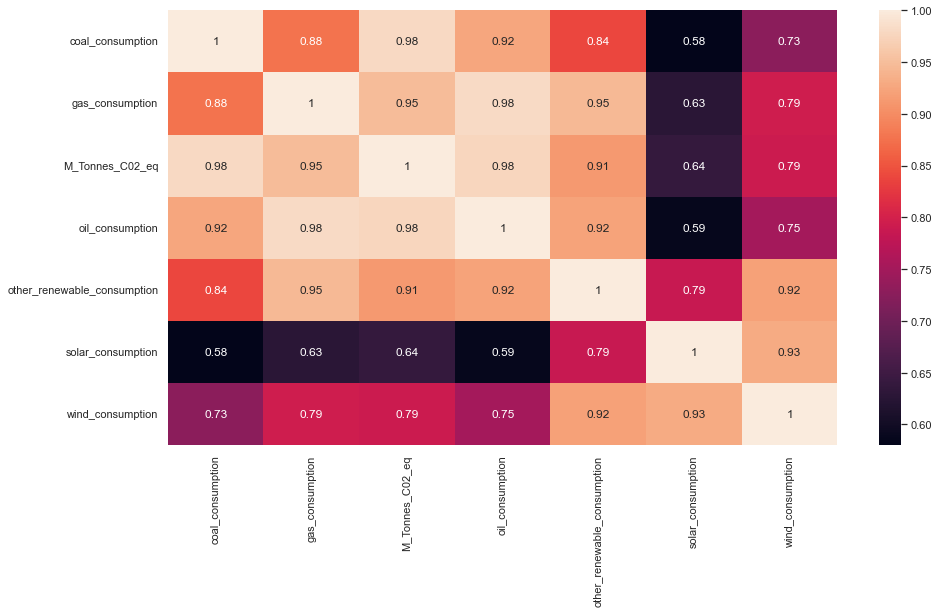

In [27]:
corr_matrix = energy.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [28]:
### X,y split

y = energy["M_Tonnes_C02_eq"]
x = energy.drop(["M_Tonnes_C02_eq"], axis = 1)

In [29]:
### Train-test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 80)
print(x_train.shape)
print(x_test.shape)

(912, 6)
(391, 6)


In [30]:
### Normaliyation by columns 

transformer = MinMaxScaler().fit(x_train)
x_train_norm = transformer.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns)
x_train_norm

<IPython.core.display.Javascript object>

,coal_consumption,gas_consumption,oil_consumption,other_renewable_consumption,solar_consumption,wind_consumption
0,0.000000,0.000261,0.004905,0.000000,0.000000,0.000000
1,0.006802,0.002685,0.004341,0.000000,0.000000,0.000000
2,0.056865,0.009360,0.027813,0.009018,0.000000,0.008036
3,0.002119,0.004145,0.001616,0.000000,0.000000,0.000000
4,0.000000,0.002164,0.013268,0.001002,0.000000,0.000000
...,...,...,...,...,...,...
907,0.000379,0.039942,0.017177,0.000000,0.000000,0.000298
908,0.000825,0.001825,0.001936,0.002004,0.000000,0.000000
909,0.000000,0.017650,0.019601,0.000000,0.000000,0.000000
910,0.139487,0.157629,0.209708,0.111723,0.001311,0.012202


In [31]:
transformer = MinMaxScaler().fit(x_test)
x_test_norm = transformer.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns)
x_test_norm

<IPython.core.display.Javascript object>

,coal_consumption,gas_consumption,oil_consumption,other_renewable_consumption,solar_consumption,wind_consumption
0,0.000221,0.001889,0.001429,0.001080,0.000000,0.000000
1,0.002480,0.019601,0.012825,0.042139,0.054806,0.015486
2,0.001151,0.000739,0.001277,0.019989,0.000000,0.000988
3,0.011559,0.012045,0.015588,0.014587,0.000000,0.000000
4,0.009189,0.027239,0.017170,0.008644,0.000000,0.001318
...,...,...,...,...,...,...
386,0.000000,0.000383,0.004574,0.000000,0.000000,0.000000
387,0.000000,0.000192,0.001925,0.000540,0.000000,0.000000
388,0.106176,0.262394,0.191977,0.205294,0.033727,0.123888
389,0.001949,0.003422,0.001239,0.000540,0.000000,0.002306


In [32]:
### Now we apply the linear model 

lm = LinearRegression()
lm.fit(x_train_norm, y_train)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
mape_train = mean_absolute_percentage_error(y_pred_train, y_train)
mape_test = mean_absolute_percentage_error(y_pred_test, y_test)


print('\nResult model with split in ', 0.3)
print("R2 score of trained dataset is", round(r2_train,3))
print("R2 score of test dataset is", round(r2_test,3))

print("Mean absolute percentage error of train dataset is", round(mape_train, 2))
print("Mean absolute percentage error of test dataset is", round(mape_test, 2))
# print(round(lm.intercept_, 2))
# print(np.round_(lm.coef_))

print('\n\nWhich source of energy are responsible of C02 emission?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance
#sorted_x = sorted(column_relevance.items(), key=lambda x: x[1])
#sorted_x


Result model with split in  0.3
R2 score of trained dataset is 0.997
R2 score of test dataset is 0.996
Mean absolute percentage error of train dataset is 0.29
Mean absolute percentage error of test dataset is 0.31


Which source of energy are responsible of C02 emission?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('coal_consumption', 5468.0),
 ('oil_consumption', 4211.0),
 ('wind_consumption', 1396.0),
 ('gas_consumption', 1092.0),
 ('solar_consumption', 650.0),
 ('other_renewable_consumption', -605.0)]